<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [8]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

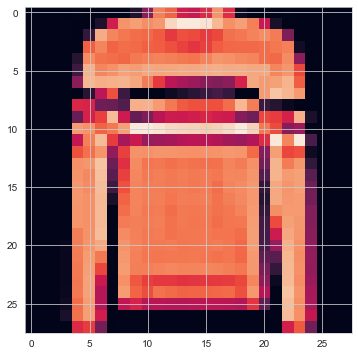

In [9]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [10]:
y_train[5]

2

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [14]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [19]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [22]:
y_train[0]

9

In [23]:
classes[y_train[0]]

'Ankle boot'

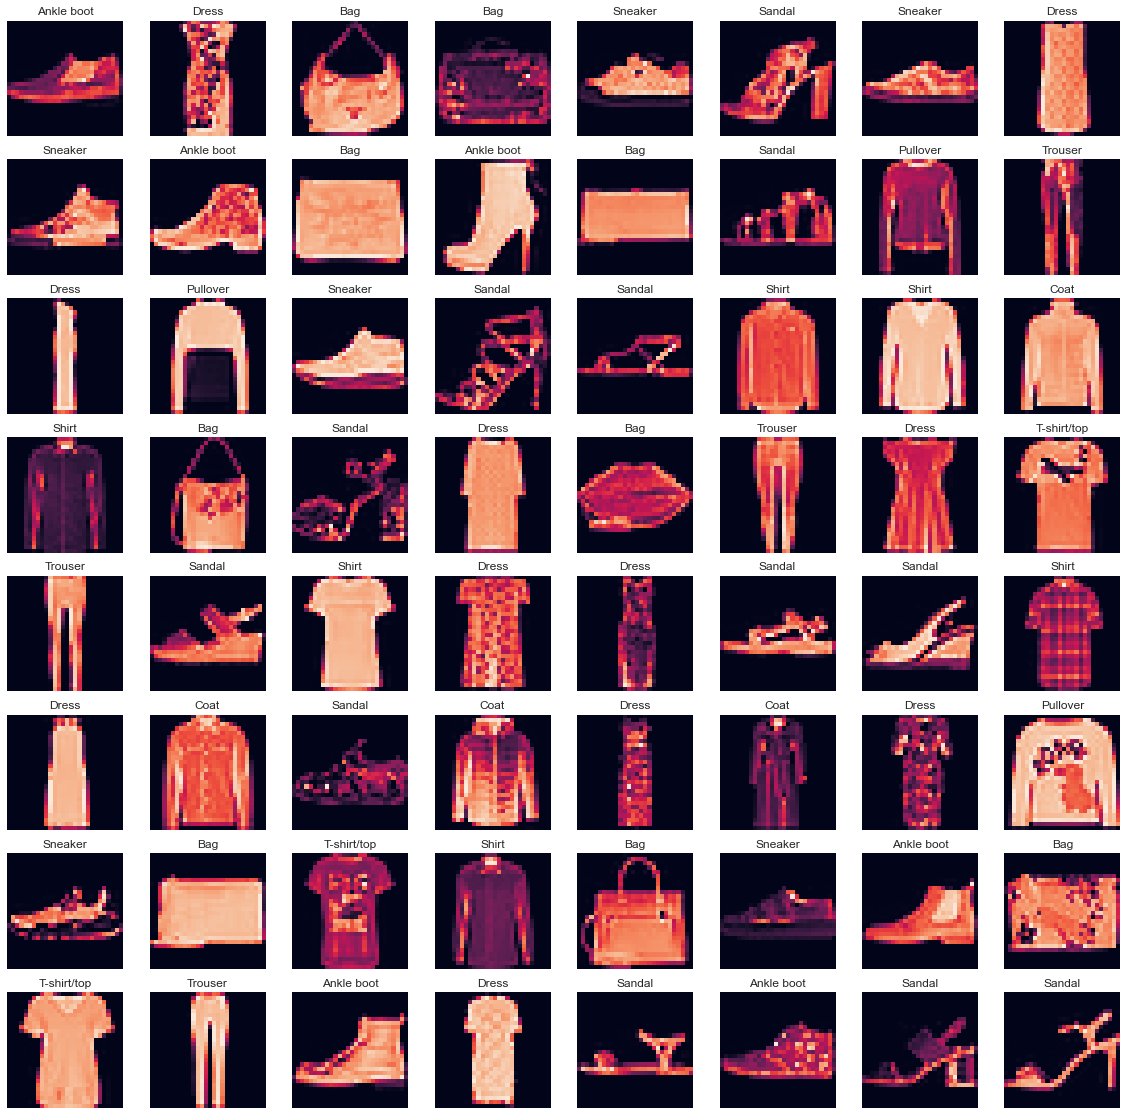

In [24]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [25]:
X_train[5].min()

0

In [26]:
X_train[5].max()

255

In [27]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [28]:
X_train[5].min()

0.0

In [29]:
X_train[5].max()

1.0

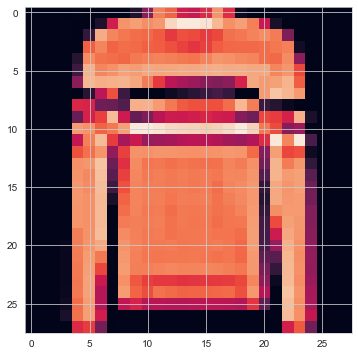

In [30]:
plt.imshow(X_train[5])

In [31]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
y_train.shape

(60000,)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [34]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [35]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [41]:
Y_train.shape

(60000, 10)

In [42]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [44]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        8096      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               6

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [49]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.3437 - accuracy: 0.8754 - val_loss: 0.3207 - val_accuracy: 0.8908
Epoch 2/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2495 - accuracy: 0.9097 - val_loss: 0.2571 - val_accuracy: 0.9071
Epoch 3/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2131 - accuracy: 0.9233 - val_loss: 0.2689 - val_accuracy: 0.9088
Epoch 4/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1965 - accuracy: 0.9307 - val_loss: 0.2450 - val_accuracy: 0.9143
Epoch 5/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1838 - accuracy: 0.9357 - val_loss: 0.3249 - val_accuracy: 0.9081
Epoch 6/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1747 - accuracy: 0.9399 - val_loss: 0.2641 - val_accuracy: 0.9174


**TASK 7: Plot values of metrics you used in your model.**

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.344,0.875,0.321,0.891
1,0.250,0.910,0.257,0.907
2,0.213,0.923,0.269,0.909
3,0.197,0.931,0.245,0.914
4,0.184,0.936,0.325,0.908


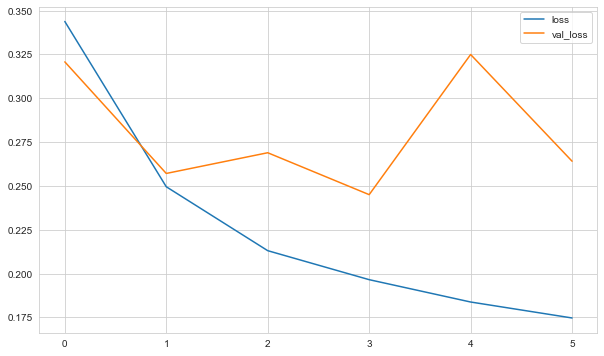

In [52]:
summary[["loss", "val_loss"]].plot();

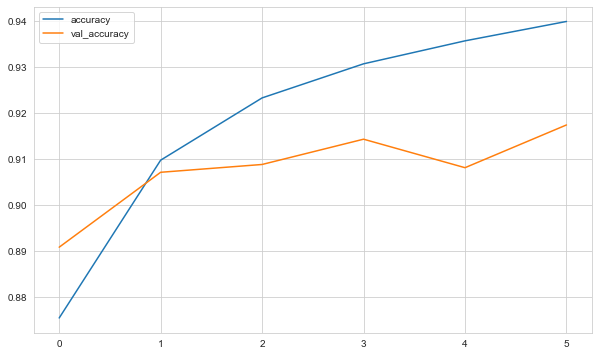

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [55]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.2450 - accuracy: 0.9143


[0.2450008988380432, 0.9143000245094299]

In [56]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2450008988380432
Test accuracy: 0.9143000245094299


In [57]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 5s 16ms/step


array([[7.8228800e-07, 5.2010725e-09, 9.4229654e-07, ..., 1.8645086e-03,
        7.2674902e-07, 9.9804771e-01],
       [5.2480114e-04, 1.8234289e-08, 9.8554623e-01, ..., 1.5889239e-06,
        9.8975534e-07, 1.6475673e-07],
       [4.0629819e-10, 1.0000000e+00, 1.7323114e-13, ..., 4.5412824e-13,
        9.9851335e-16, 2.4251600e-17],
       ...,
       [5.9205913e-12, 4.8284250e-22, 3.9992583e-14, ..., 4.7028654e-15,
        1.0000000e+00, 3.9328462e-12],
       [6.3545599e-11, 1.0000000e+00, 1.7031563e-13, ..., 2.5994003e-14,
        9.4948946e-17, 2.7652386e-17],
       [6.4925221e-04, 7.4050964e-05, 1.7489900e-04, ..., 2.7461868e-02,
        1.0632332e-02, 8.8386342e-04]], dtype=float32)

In [58]:
pred_prob.shape

(10000, 10)

In [59]:
pred_prob[0]

array([7.8228800e-07, 5.2010725e-09, 9.4229654e-07, 1.2194870e-07,
       1.7640315e-06, 7.9133883e-05, 4.2945944e-06, 1.8645086e-03,
       7.2674902e-07, 9.9804771e-01], dtype=float32)

In [60]:
np.argmax(pred_prob[0])

9

In [61]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
y_pred.shape

(10000,)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.85      0.86      1000
           3       0.92      0.93      0.93      1000
           4       0.82      0.91      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.77      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [64]:
print(confusion_matrix(y_test, y_pred))

[[817   1  21  20   4   1 130   0   6   0]
 [  0 983   1   9   1   0   4   0   2   0]
 [ 12   1 846   7  76   0  58   0   0   0]
 [  5   3   8 928  36   0  17   0   3   0]
 [  0   0  38  14 905   0  43   0   0   0]
 [  0   0   0   0   0 975   0  11   3  11]
 [ 70   1  53  25  74   0 768   0   9   0]
 [  0   0   0   0   0   6   0 981   1  12]
 [  2   0   0   2   1   1   4   1 989   0]
 [  0   0   0   0   0   2   1  46   0 951]]


<AxesSubplot:>

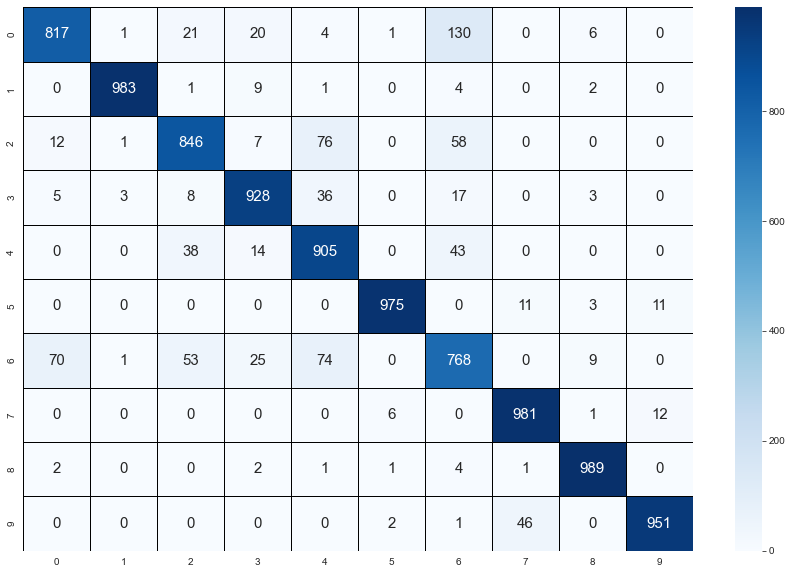

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

## Prediction

In [67]:
my_image = X_test[44]

In [68]:
my_image.shape

(28, 28, 1)

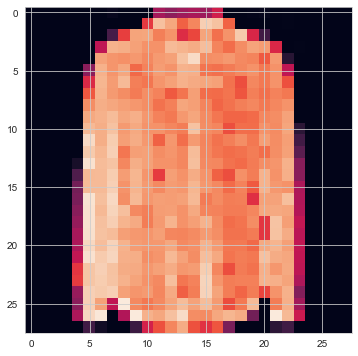

In [69]:
plt.imshow(my_image)

In [70]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 49ms/step


In [71]:
image_prediction

array([[5.2227042e-05, 2.0941589e-07, 4.3016407e-03, 9.4015042e-05,
        4.0154431e-02, 2.7106948e-05, 9.5534104e-01, 6.6003126e-06,
        1.7449645e-05, 5.3611057e-06]], dtype=float32)

In [72]:
np.argmax(image_prediction, axis=1)

array([6], dtype=int64)

In [73]:
result=np.argmax(image_prediction, axis=1)
result

array([6], dtype=int64)

In [74]:
classes[int(result)]

'Shirt'

In [75]:
model.save("cnn-1.h5")

In [76]:
model=tf.keras.models.load_model('cnn-1.h5')

In [77]:
X_test[15].shape

(28, 28, 1)

In [78]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

1/1 [==============================] - 0s 167ms/step


In [79]:
np.argmax(pred)

1

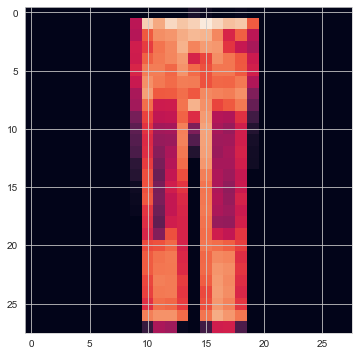

In [80]:
plt.imshow(X_test[15])

In [81]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [91]:
result=np.argmax(pred, axis=1)
result

array([1], dtype=int64)

In [92]:
classes[int(result)]

'Trouser'

# End of Assignment